In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [60]:
# Create a sample dataset: Car Price vs Mileage & Age
data = {
    "Mileage": [5000, 15000, 25000, 35000, 45000, 60000, 70000, 80000, 90000, 100000],
    "Age": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Age in years
    "Price": [25000, 22000, 20000, 18000, 16000, 14000, 12000, 10000, 8000, 6000]  # Car price
}

In [61]:
# Convert data to DataFrame
df = pd.DataFrame(data)

In [62]:
# Split features (X) and target (y)
X = df[["Mileage", "Age"]]
y = df["Price"]

In [63]:
 #Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Standardize the features (KNN performs better with scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Train KNN Regression model
k = 3  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [66]:
# Predict on test data
y_pred = knn.predict(X_test_scaled)

In [67]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1166.67
Mean Squared Error: 1388888.89
R² Score: 0.97


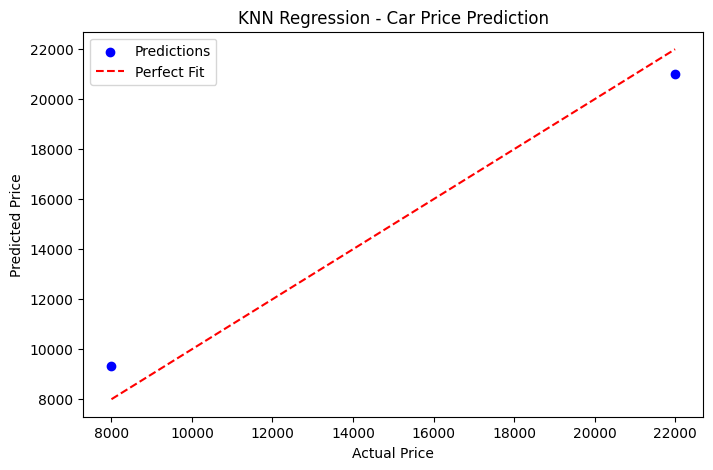

In [68]:
# Plot predictions vs actual prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", label="Predictions")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression - Car Price Prediction")
plt.legend()
plt.show()